In [1]:
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import webcolors
import matplotlib.colors as mc

dimensions = (899, 1599, 3)


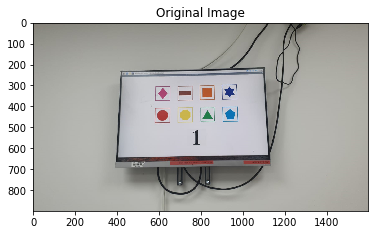

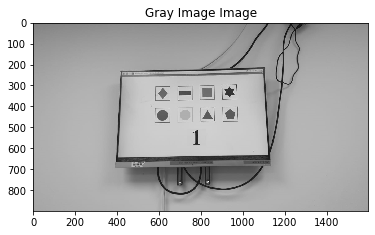

rectangle x-   0, y-   0, width=1599, height=899
hexagon x- 703, y- 761, width=  4, height=  3
pentagon x- 696, y- 760, width=  5, height=  4
hexagon x- 835, y- 756, width=  4, height=  4
hexagon x- 829, y- 756, width=  4, height=  4


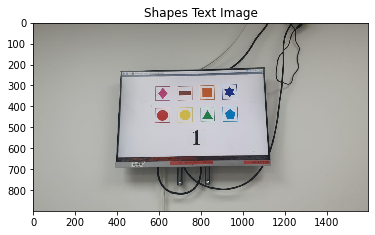

In [2]:
img = cv2.imread(r'C:\Users\davidra\Desktop\NINJA_RAFAEL\Ninja2-master\DetectShapes\pic_test.jpg')
imgGry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(f"dimensions = {img.shape}")


RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img, interpolation='none')
plt.title('Original Image')
plt.show()

RGB_imgGry = cv2.cvtColor(imgGry, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_imgGry, interpolation='none')
plt.title('Gray Image Image')
plt.show()

ret , thrash = cv2.threshold(imgGry, 240 , 255, cv2.CHAIN_APPROX_NONE)
contours , hierarchy = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
shapes_order = []

for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True);
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 0);
    x = approx.ravel()[0];
    y = approx.ravel()[1] - 5;
    (xc,yc,w,h) = cv2.boundingRect(contour)
    if len(approx) == 3:
        cv2.putText( img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0) )
        shapes_order.append([1,xc,yc,w,h])
        print(f"triangle x-{xc:4}, y-{yc:4}, width={w:3}, height={h:3}")
    elif len(approx) == 4 :
        x, y , w, h = cv2.boundingRect(approx);
        aspectRatio = float(w)/h;
        #print(aspectRatio);
        if aspectRatio >= 0.95 and aspectRatio < 1.05:
            cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            shapes_order.append([2,xc,yc,w,h])
            print(f"square x-{xc:4}, y-{yc:4}, width={w:3}, height={h:3}")            
        else:
            cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            shapes_order.append([3,xc,yc,w,h])
            print(f"rectangle x-{xc:4}, y-{yc:4}, width={w:3}, height={h:3}")
    elif len(approx) == 5 :
        cv2.putText(img, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        shapes_order.append([4,xc,yc,w,h])
        print(f"pentagon x-{xc:4}, y-{yc:4}, width={w:3}, height={h:3}")
    elif len(approx) == 6 :
        cv2.putText(img, "hexagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        shapes_order.append([5,xc,yc,w,h])
        print(f"hexagon x-{xc:4}, y-{yc:4}, width={w:3}, height={h:3}")
    elif len(approx) == 10 :
        cv2.putText(img, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        shapes_order.append([6,xc,yc,w,h])
        print(f"star x-{xc:4}, y-{yc:4}, width={w:3}, height={h:3}")
    else:
        cv2.putText(img, "circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        shapes_order.append([7,xc,yc,w,h])
        print(f"circle x-{xc:4}, y-{yc:4}, width={w:3}, height={h:3}")

#plt.rcParams['figure.figsize'] = [12, 8]
#plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
#RGB_img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(RGB_img, interpolation='nearest')
plt.title('Shapes Text Image')
plt.show()

In [7]:
len(contours)

5

In [8]:
hierarchy

array([[[-1, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [ 4,  2, -1,  0],
        [-1,  3, -1,  0]]], dtype=int32)

In [ ]:

print('1 - triangle, 2 - square, 3 - rectangle, 4- pentagon, 5- hexagon, 6- star, 7- circle')
print(shapes_order)

In [ ]:
import matplotlib.colors as mc

def get_colour_name(rgb_triplet):
    min_colours = {}
    for name, key in mc.CSS4_COLORS.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - rgb_triplet[0]) ** 2
        gd = (g_c - rgb_triplet[1]) ** 2
        bd = (b_c - rgb_triplet[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

In [ ]:
first_row = []
second_row = []

for shape in shapes_order:
    if shape[2] <= img.shape[0]/2 :
        first_row.append((shape,shape[1]))
    else:
        second_row.append((shape,shape[1]))

first_row_sorted = sorted(first_row, key=lambda i: i[-1])
second_row_sorted = sorted(second_row, key=lambda i: i[-1])
print(first_row_sorted+second_row_sorted)

In [ ]:
print('1 - triangle, 2 - square, 3 - rectangle, 4- pentagon, 5- hexagon, 6- star, 7- circle')

In [ ]:
def GetBBLocationColor(location, img):
    _, xc, yc, w, h = location
    return tuple(img[int(yc+h/2),int(xc+w/2)])

In [ ]:
# print shapes order
for ordered_shape in (first_row_sorted+second_row_sorted):
    if ordered_shape[0][0]==1 : print('triangle') 
    elif ordered_shape[0][0]==2 : print('square') 
    elif ordered_shape[0][0]==3 : print('rectangle') 
    elif ordered_shape[0][0]==4 : print('pentagon') 
    elif ordered_shape[0][0]==5 : print('hexagon') 
    elif ordered_shape[0][0]==6 : print('star') 
    elif ordered_shape[0][0]==7 : print('circle') 
    #print(f"with color {GetBBLocationColor(ordered_shape[0], RGB_img)}" )
    color = GetBBLocationColor(ordered_shape[0], RGB_img)
    print(f"with {get_colour_name(color)} color")

In [ ]:
plt.imshow(RGB_img, interpolation='nearest')
plt.title('Shapes Text Image')
plt.show()

In [ ]:
plt.imshow(RGB_img, interpolation='none')
plt.title('Original Image')
plt.show()

In [ ]:
print('1 - triangle, 2 - square, 3 - rectangle, 4- pentagon, 5- hexagon, 6- star, 7- circle')
print(shapes_order)